QUESTION: AGME insurance Inc. offers affortable health insurance to thousands of customewrs all over unit4ed states. as the lead data scientist at ACME,your're tasked with creating an automated system to estimate the annual medical expenditure for new  customers, using information such as their age,sex,BMI,children,smoking habits and region residence


Estimates from your system will be used to determine the annual insurance premium(amount paid every month) offered to the customers.Due to regulatory requirments,you must be able to explain why system outputs a certain prediction.

you have given a csv file contained verified historical data over 1300 customers.

In [2]:
import pandas as pd

medical_pd = pd.read_csv('insurance.csv')

medical_pd.tail()



,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


the datasets contain 1338 row and 7 columns

In [3]:
medical_pd.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


the ranges of values in numerical columns seems resonable too(no negative ages!) so we may not have to do much data cleaning or correction

Exploratory Analysis and Visulization

lets explore the data by visualizing the distributions of values in some columns of datasets,and their realationship between "chargers" and other columns

we'll use libraries Matplotlib,Seaborn and plotly for visulualization.

In [8]:
# Importing Seaborn for statistical data visualization
import seaborn as sns
# Importing Plotly Express for creating interactive visualizations
import plotly.express as px

# Importing Matplotlib for creating static, animated, and interactive visualizations
import matplotlib
import matplotlib.pyplot as plt

# Enabling inline plotting for Matplotlib in Jupyter Notebook
%matplotlib inline

In [10]:

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] =(10,6)
matplotlib.rcParams['figure.facecolor'] ='#00000000'

Age:  age is a numerical column. the minimum is 18 and max is 64. thus we can visualizethe distribution of ages using 47 bins(one of each year) and a box plot we'll use plotly  to make the chart interactive,but you can create similar chart using seaborn.

In [16]:
fig = px.histogram(medical_pd,
                   x= 'age', 
                    marginal='box',
                     nbins =47,
                    title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

the distibution of ages in the datasets is almost uniform with 20-30 costumers at very  age. except fro the ages 18 and 19,which seem to have over twice as many customers as other ages. the uniform distribution might arise from the fact that there isn't a big variation in the numberr of of peaple peaple of any given age(between 18 & 64) in usa

Body Mass Index:
lets look at the distribution of BMI of customers using histogram and box plot

In [21]:
fig = px.histogram(medical_pd,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['purple'],
                   title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seemto form a Gaussian distribution centered around the valur 30,with few outliers
towards the right.

Charges:
        Lets visualize charge distribution. i.e. the annual medical charges for customers. this is the column we are trying to predict.we'll distiguish chargers for smoker and non-smoker.

In [38]:
fig = px.histogram(medical_pd,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['grey','green'],
                   title='Annual Medical charges')
fig.update_layout(bargap=0.1)
fig.show()

Obersarvations:

   . For most of the customers,the annual medical charges are under $10,000. Only a fraction of customers have higher.possibly due to accidents,mojor emergencies,genetic diseases. The distribution follows "power law".

. There is a significant diffrence in the charges between smoker and non smoker. while the the median of non smoker is 7300. and for smokers it is around 35k. which is basically very high.

lets visualize smoker using("yes" or "no") using histogram

In [39]:
medical_pd.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [40]:
px.histogram(medical_pd,x='smoker',color='sex',title='smoker')

it appears that about 20% customers reported that they smoke.we can all see that smokers appears a more common habit in males.

we have visualized the indivitual columns. now lets visualize the relationship between two columns.

AGE AND CHARGES:
            relationship between age and charges using scatter plot. each point in the scatter plot
            represent a customer. we'll also use "smoker" coulumns to color the points

In [65]:
fig = px.scatter(medical_pd,
                 x='age',
                 y='charges', 
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Ages vs Charges')

fig.update_traces(marker_size=5)
fig.show()

Observations:
  .The general trend seems to be that medical charges increses with age,as we might expect.
  however there is signifcant variation at every age. and it is clear that age alone cannot determine the expanse.

  .we can see three 'cluster' of points,each of which seems to form a line with increasing slop:

  1.The first and largest cluster consist of primary of presumbly "healthy and non-smokers"
  who have might have very low medical expanses. compared to others.

  2.The second consist of mix of smokers and non-smokers. these are two distinct but overlapping clusters:"non smokers with major medical issues and smokers without major medical issues.

3.The third conisit of smokers with major medical issues. which we can see in the graph that their charges are high

BMI AND CHARGES

In [49]:
fig =px.scatter(medical_pd,
                x='bmi',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='bmi vs charges')
fig.update_traces(marker_size =5)
fig.show()

It appears that for non-smokers an increase in bmi doesnt seem to related to an increase in medical charges.
however,medical charges seem to be significantly higher for smokers with a BMI of more than 30.

Correlation

As you can tell from the analysis the values in some coloumns are more closely related to values in charges.
example age and charges seem to grow together. but bmi vs charge dont.

this relationship is numerically expressed using a measure called correlation coefficeint,which can be computed using
.corr method in pandas series.

In [50]:
medical_pd.charges.corr(medical_pd.age)

np.float64(0.2990081933306478)

In [51]:
medical_pd.charges.corr(medical_pd.bmi)

np.float64(0.19834096883362887)

To compute with categorical columns,they must have first converted to numerical columns. example is shown below

In [57]:
smoker_value ={"no":0,'yes':1}
smoker_numeric =medical_pd.smoker.map(smoker_value)
medical_pd.charges.corr(smoker_numeric)

np.float64(0.7872514304984778)

Strength: the greater the absolute valueof the correlation,the stronger the relatioship

Direction: the sign of correlation coffecient represent the direction of the relationship.

. positive means when one variable value increases,then the other variable also tends to increase.positive relatioship produces an upward slop on scatterplot. negative vis versa

The result of .corr is called correlation matrix and it is often represented by heatmaps

Text(0.5, 1.0, 'Correlation Matrix')

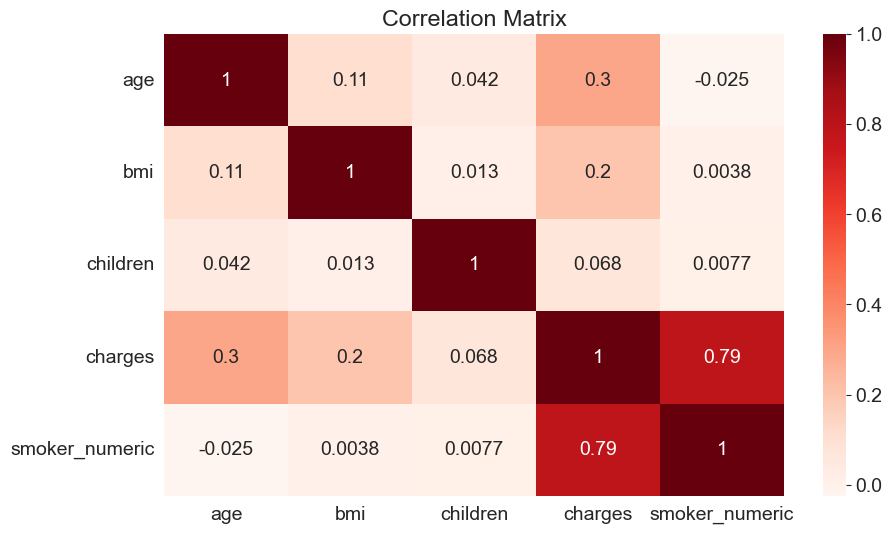

In [60]:
sns.heatmap(medical_pd.select_dtypes(include=['number']).corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

Linear Regression Using a Single Feature